1. Вивести перші рядки таблиці за допомогою методу head
2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
3. Замініть у таблиці значення "—" на значення NaN
4. Визначте типи всіх стовпців за допомогою dataframe.dtypes
5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
7. Видаліть з таблиці дані по всій країні, останній рядок таблиці
8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
10. У якому регіоні була найвища народжуваність у 2014 році?
Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

Перші рядки таблиці:
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —

Розмірність таблиці (рядків, стовпців): (28, 9)

Типи стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

Частка пропусків в кожній колонці:
Регіон    1.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

Список регіонів з народжуваністю у 2019 році вище середньої по Україні:
2             Волинська
6    

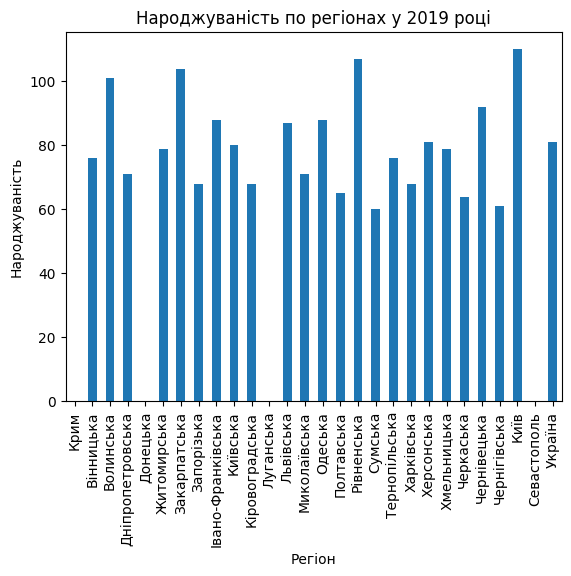

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#"

df_list = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України")

# Вивести перші рядки таблиці за допомогою методу head
df = df_list[0]
print("Перші рядки таблиці:")
print(df.head())

# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print("\nРозмірність таблиці (рядків, стовпців):", df.shape)

# Замініть у таблиці значення "—" на значення NaN
df.replace("—", np.nan, inplace=True)

# Визначте типи всіх стовпців за допомогою dataframe.dtypes
print("\nТипи стовпців:")
print(df.dtypes)

# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
non_numeric_columns = df.columns[df.dtypes == object]
df_numeric = df.copy()
df_numeric[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print("\nЧастка пропусків в кожній колонці:")
print(df_numeric.isnull().mean())

# Видаліть з таблиці дані по всій країні, останній рядок таблиці
df_numeric = df_numeric.iloc[:-1]

# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_birth_rate_2019 = df['2019'].replace('—', np.nan).astype(float).mean()
regions_above_average_2019 = df[df['2019'].astype(float) > average_birth_rate_2019]['Регіон']
print("\nСписок регіонів з народжуваністю у 2019 році вище середньої по Україні:")
print(regions_above_average_2019)

# Знаходимо регіон з найвищою народжуваністю у 2014 році
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
region_highest_birth_rate_2014 = df.loc[df['2014'].idxmax(), 'Регіон']
print("\nРегіон з найвищою народжуваністю у 2014 році:", region_highest_birth_rate_2014)

# Побудова стовпчикової діаграми народжуваності по регіонах у 2019 році
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')
df.plot(kind='bar', x='Регіон', y='2019', legend=False)
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.show()



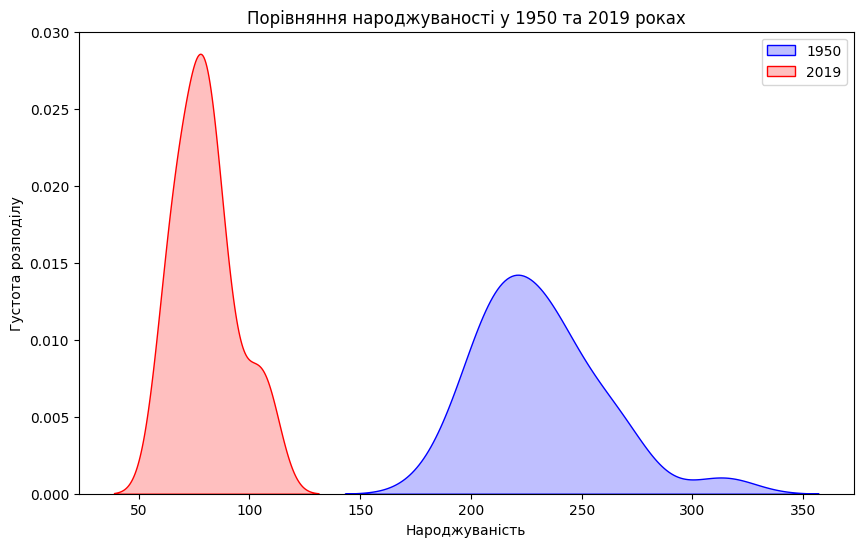

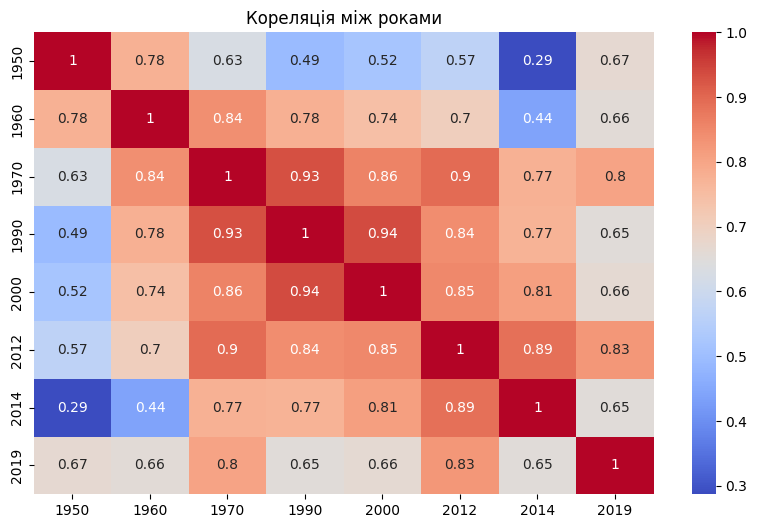

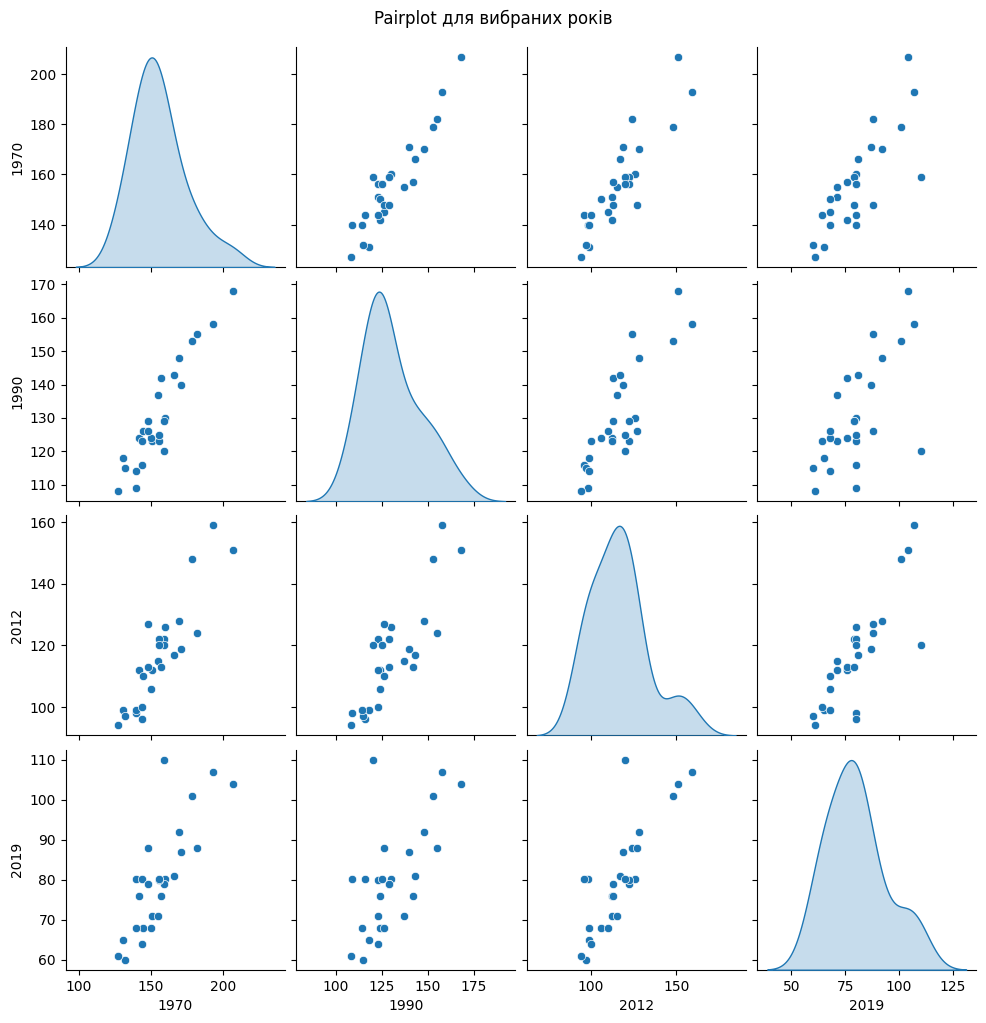

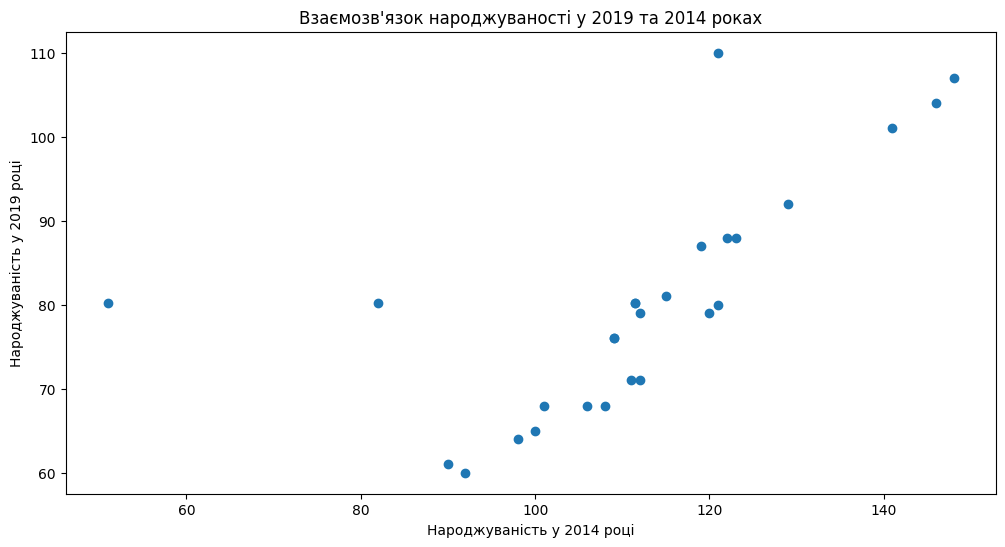

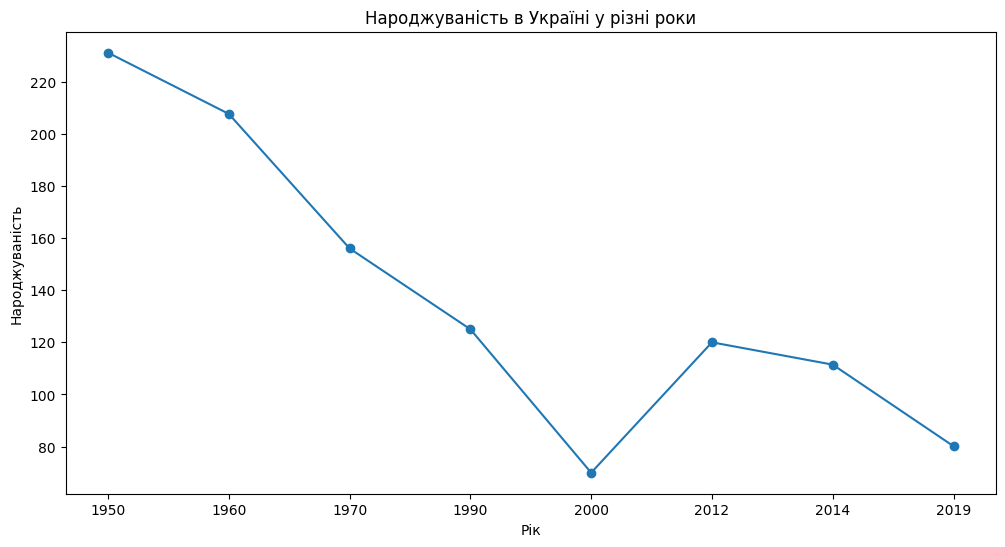

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Виводимо графіки всередині документа
%matplotlib inline

# Графік 1: Порівняння народжуваності у 1950 та 2019 роках
plt.figure(figsize=(10, 6))
sns.kdeplot(df_numeric['1950'].dropna(), label='1950', color='blue', fill=True)
sns.kdeplot(df_numeric['2019'].dropna(), label='2019', color='red', fill=True)
plt.title('Порівняння народжуваності у 1950 та 2019 роках')
plt.xlabel('Народжуваність')
plt.ylabel('Густота розподілу')
plt.legend()
plt.show()

# Графік 2: Кореляція між роками
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric[['1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']].corr(), annot=True, cmap='coolwarm')
plt.title('Кореляція між роками')
plt.show()


# Графік 3: Pairplot для деяких років
years_subset = ['1970', '1990', '2012', '2019']
sns.pairplot(df_numeric[years_subset].dropna(), diag_kind='kde')
plt.suptitle('Pairplot для вибраних років', y=1.02)
plt.show()


# Графік 4: Взаємозв'язок народжуваності у 2019 році та попередніх років
plt.figure(figsize=(12, 6))
plt.scatter(df_numeric['2014'], df_numeric['2019'])
plt.title('Взаємозв\'язок народжуваності у 2019 та 2014 роках')
plt.xlabel('Народжуваність у 2014 році')
plt.ylabel('Народжуваність у 2019 році')
plt.show()

# Графік 5: Народжуваність в Україні у різні роки
plt.figure(figsize=(12, 6))
df_numeric.loc[df_numeric.index[-1], '1950':'2019'].plot(kind='line', marker='o')
plt.title('Народжуваність в Україні у різні роки')
plt.xlabel('Рік')
plt.ylabel('Народжуваність')
plt.show()
